# Exercises in machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv("train.csv", dtype={"Age": np.float64}, )
test  = pd.read_csv("test.csv", dtype={"Age": np.float64}, )

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train_corr = train.corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## check null

In [6]:
train.isnull().any(axis = 0)

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [7]:
test.isnull().any(axis = 0)

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
train.Age = train.Age.fillna(test.Age.median())
train.Fare = train.Fare.fillna(test.Fare.median())
test.Age = test.Age.fillna(test.Age.median())
test.Fare = test.Fare.fillna(test.Fare.median())    

In [14]:
train.Sex = train.Sex.replace(['male', 'female'], [0, 1])
test.Sex = test.Sex.replace(['male', 'female'], [0, 1])

In [15]:
train_corr = train.corr()
train_corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034759,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.061956,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.344489,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.079306,0.114631,0.245489,0.182333
Age,0.034759,-0.061956,-0.344489,-0.079306,1.000000,-0.233396,-0.168329,0.099571
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233396,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.168329,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.099571,0.159651,0.216225,1.000000


## analysis

([array([ 80.,  97., 372.]), array([216., 184., 491.])],
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 2 Lists of Patches objects>)

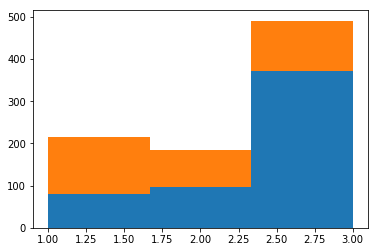

In [34]:
split_data = []
for survived in [0,1]:
    split_data.append(train[train['Survived']==survived])
    
a = [i["Pclass"].dropna() for i in split_data]
plt.hist(a, histtype="barstacked", bins=3)

([array([ 13.,  13.,   8.,  63.,  80., 191.,  47.,  39.,  30.,  23.,  14.,
          11.,  10.,   3.,   4.,   0.]),
  array([ 44.,  20.,  19.,  96., 122., 285.,  88.,  67.,  47.,  39.,  24.,
          18.,  14.,   3.,   4.,   1.])],
 array([ 0.42   ,  5.39375, 10.3675 , 15.34125, 20.315  , 25.28875,
        30.2625 , 35.23625, 40.21   , 45.18375, 50.1575 , 55.13125,
        60.105  , 65.07875, 70.0525 , 75.02625, 80.     ]),
 <a list of 2 Lists of Patches objects>)

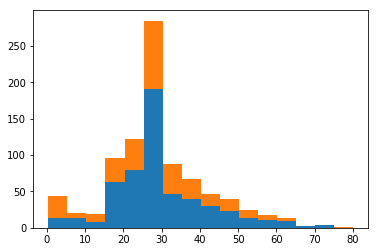

In [38]:
hist = [i["Age"].dropna() for i in split_data]
plt.hist(hist, histtype="barstacked", bins=16)

In [16]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]

In [17]:
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))

In [18]:
results = []
names = []
for name, model in models:
    result = cross_val_score(model, train[predictors], train["Survived"],  cv=3)
    names.append(name)
    results.append(result)

In [23]:
for i in range(len(names)):
    print(names[i],results[i].mean())

LogisticRegression 0.7890011223344556
SVC 0.6924803591470258
LinearSVC 0.7575757575757577
KNeighbors 0.6980920314253648
DecisionTree 0.7643097643097643
RandomForest 0.8002244668911335
MLPClassifier 0.7811447811447811


In [24]:
alg = RandomForestClassifier()
alg.fit(train[predictors], train["Survived"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
predictions = alg.predict(test[predictors])

In [27]:
describe = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })

In [41]:
describe

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
